# DO THE AVG. DAILY PSI RATES HAVE MORE EARTHQUAKES AROUND THEM?

- sort wells df by PSI
- plot lat/longs of earthquakes
- plot lat/longs of wells
- do locations overlap?
- is there a correlation to PSI?

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#get csvs
ok_inj_wells = '../Project_1/InjectionWells.csv'
ok_eqs = '../Project_1/okQuakes.csv'

#turn csvs to DFs
ok_inj_wells_df = pd.read_csv(ok_inj_wells)
ok_eqs_df = pd.read_csv(ok_eqs)


## Look at DFs

In [2]:
ok_eqs_df

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,1973-03-17T07:43:05.500Z,36.087000,-106.168000,6.00,4.50,mb,NaN,NaN,NaN,NaN,...,2014-11-06T23:21:10.078Z,New Mexico,earthquake,NaN,NaN,NaN,NaN,reviewed,us,us
1,1973-05-25T14:40:13.900Z,33.917000,-90.775000,6.00,NaN,NaN,NaN,NaN,NaN,NaN,...,2014-11-06T23:21:12.859Z,Mississippi,earthquake,NaN,NaN,NaN,NaN,reviewed,s,us
2,1973-09-19T13:28:20.500Z,37.160000,-104.594000,5.00,NaN,NaN,NaN,NaN,NaN,NaN,...,2014-11-06T23:21:20.295Z,Colorado,earthquake,NaN,NaN,NaN,NaN,reviewed,us,us
3,1973-09-23T03:58:54.900Z,37.148000,-104.571000,5.00,4.20,mb,NaN,NaN,NaN,NaN,...,2014-11-06T23:21:20.346Z,Colorado,earthquake,NaN,NaN,NaN,NaN,reviewed,us,us
4,1974-02-15T13:33:49.200Z,36.500000,-100.693000,24.00,4.50,mb,NaN,NaN,NaN,NaN,...,2014-11-06T23:21:22.859Z,Oklahoma,earthquake,NaN,NaN,NaN,NaN,reviewed,us,us
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13949,2016-09-20T05:38:38.350Z,36.373500,-96.818700,4.69,2.30,ml,NaN,54.0,0.01800,0.16,...,2016-09-20T16:13:04.040Z,"4km NNW of Pawnee, Oklahoma",earthquake,0.90,1.80,0.059,38.0,reviewed,us,us
13950,2016-09-20T06:36:35.520Z,36.412200,-96.882400,4.41,1.40,ml,NaN,59.0,0.02500,0.18,...,2016-09-20T16:21:03.040Z,"10km NW of Pawnee, Oklahoma",earthquake,0.80,2.00,0.062,34.0,reviewed,us,us
13951,2016-09-20T16:01:08.610Z,37.277167,-98.072667,5.85,2.43,ml,15.0,237.0,0.05185,0.04,...,2016-09-20T19:08:23.720Z,"4km WSW of Harper, Kansas",earthquake,0.38,0.33,0.179,17.0,reviewed,ismp,ismp
13952,2016-09-20T17:31:48.380Z,36.939300,-97.896000,2.32,3.00,mb_lg,NaN,37.0,0.05600,0.18,...,2016-09-20T17:43:43.040Z,"20km NW of Medford, Oklahoma",earthquake,1.00,3.70,0.076,45.0,reviewed,us,us


In [3]:
ok_inj_wells_df

,API#,Operator,Operator ID,WellType,WellName,WellNumber,OrderNumbers,Approval Date,County,Sec,...,Rng,QQQQ,LAT,LONG,PSI,BBLS,ZONE,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,3.500300e+09,PHOENIX PETROCORP INC,19499.0,2R,SE EUREKA UNIT-TUCKER #1,21,1.338560e+05,9/6/1977,ALFALFA,13,...,10W,C-SE SE,36.900324,-98.218260,"2,500",300,CHEROKEE,NaN,NaN,NaN
1,3.500300e+09,CHAMPLIN EXPLORATION INC,4030.0,2R,CHRISTENSEN,1,4.702580e+05,11/27/2002,ALFALFA,21,...,09W,C-NW NW,36.896636,-98.177720,"2,400","1,000",RED FORK,NaN,NaN,NaN
2,3.500321e+09,LINN OPERATING INC,22182.0,2R,NE CHEROKEE UNIT,85,3.294260e+05,8/19/1988,ALFALFA,24,...,11W,SE NE,36.806113,-98.325840,"1,050","1,000",RED FORK,NaN,NaN,NaN
3,3.500321e+09,SANDRIDGE EXPLORATION & PRODUCTION LLC,22281.0,2R,VELMA,2-19,2.816520e+05,7/11/1985,ALFALFA,19,...,10W,SW NE NE SW,36.888589,-98.318530,"3,152","1,000",RED FORK,NaN,NaN,NaN
4,3.500321e+09,CHAMPLIN EXPLORATION INC,4030.0,2R,GRAY,1A,4.702570e+05,11/27/2002,ALFALFA,20,...,09W,SE SW NW,36.892128,-98.194620,"1,000","2,400",RED FORK,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11121,3.515324e+09,SANDRIDGE EXPLORATION & PRODUCTION LLC,22281.0,2D,JIMMIE SWD,1-28,1.303440e+09,12/7/2012,WOODWARD,28,...,18W,E2 W2 SW SW,36.436857,-99.137391,"2,940","60,000","MUSSELLEM, OKLAHOMA",NaN,NaN,NaN
11122,3.515324e+09,"OVERFLOW ENERGY, LLC",22383.0,CDW,MUTUAL SWD,1,1.608510e+09,10/21/2016,WOODWARD,09,...,18W,N2 NE NE,0.000000,0.000000,"1,625","25,000","DOUGLAS, WOLFCAMP",NaN,NaN,NaN
11123,3.515324e+09,"RED MOUNTAIN OPERATING, LLC",23694.0,2D,HEDGES,1 SWD,1.703870e+09,12/28/2016,WOODWARD,14,...,17W,SW SE SE,0.000000,0.000000,"1,550","15,000","VIRGILIAN, WOLFCAMP,",NaN,NaN,NaN
11124,3.515324e+09,"RED MOUNTAIN OPERATING, LLC",23695.0,2D,GARVIE,1 SWD,1.703600e+09,12/28/2016,WOODWARD,33,...,17W,NW NE NE,0.000000,0.000000,"1,550","15,000","ADMIRE, CHASE, COUNCIL GROVE, DOUGLAS, PONTOTO...",NaN,NaN,NaN


In [4]:
ok_inj_wells_df.columns

Index(['API#', 'Operator', 'Operator ID', 'WellType', 'WellName', 'WellNumber',
       'OrderNumbers', 'Approval Date', 'County', 'Sec', 'Twp', 'Rng', 'QQQQ',
       'LAT', 'LONG', 'PSI', 'BBLS', 'ZONE', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20'],
      dtype='object')

## Cleanup Earthquake DF

In [5]:
#find all place names
places = ok_eqs_df["place"].unique()
#isolate eqs to only Oklahoma
ok_eqs_df = ok_eqs_df.loc[ok_eqs_df["place"].str.contains("Oklahoma")]
ok_eqs_df

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
4,1974-02-15T13:33:49.200Z,36.5000,-100.6930,24.00,4.5,mb,NaN,NaN,NaN,NaN,...,2014-11-06T23:21:22.859Z,Oklahoma,earthquake,NaN,NaN,NaN,NaN,reviewed,us,us
21,1974-12-16T02:30:21.400Z,35.3300,-97.4800,10.00,2.6,ml,NaN,NaN,NaN,NaN,...,2014-11-06T23:21:27.851Z,"Oklahoma City urban area, Oklahoma",earthquake,NaN,NaN,NaN,NaN,reviewed,m,tul
34,1975-09-13T01:25:02.800Z,34.1390,-97.3690,5.00,3.4,lg,NaN,NaN,NaN,NaN,...,2014-11-06T23:21:31.918Z,Oklahoma,earthquake,NaN,NaN,NaN,NaN,reviewed,us,tul
36,1975-10-12T02:58:11.200Z,34.8160,-97.4060,20.00,3.2,lg,NaN,NaN,NaN,NaN,...,2014-11-06T23:21:32.248Z,Oklahoma,earthquake,NaN,NaN,NaN,NaN,reviewed,us,tul
37,1975-11-29T14:29:40.900Z,34.5210,-97.3470,5.00,3.5,lg,NaN,NaN,NaN,NaN,...,2014-11-06T23:21:32.839Z,Oklahoma,earthquake,NaN,NaN,NaN,NaN,reviewed,us,slm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13948,2016-09-20T04:59:11.140Z,36.9246,-97.8946,2.62,3.9,mwr,NaN,18.0,0.063,0.46,...,2016-09-20T19:15:48.944Z,"19km NW of Medford, Oklahoma",earthquake,0.8,5.7,0.036,75.0,reviewed,us,us
13949,2016-09-20T05:38:38.350Z,36.3735,-96.8187,4.69,2.3,ml,NaN,54.0,0.018,0.16,...,2016-09-20T16:13:04.040Z,"4km NNW of Pawnee, Oklahoma",earthquake,0.9,1.8,0.059,38.0,reviewed,us,us
13950,2016-09-20T06:36:35.520Z,36.4122,-96.8824,4.41,1.4,ml,NaN,59.0,0.025,0.18,...,2016-09-20T16:21:03.040Z,"10km NW of Pawnee, Oklahoma",earthquake,0.8,2.0,0.062,34.0,reviewed,us,us
13952,2016-09-20T17:31:48.380Z,36.9393,-97.8960,2.32,3.0,mb_lg,NaN,37.0,0.056,0.18,...,2016-09-20T17:43:43.040Z,"20km NW of Medford, Oklahoma",earthquake,1.0,3.7,0.076,45.0,reviewed,us,us


## Cleanup Wells DF

In [6]:
#drop completely null columns
ok_inj_wells_df = ok_inj_wells_df.drop(columns = ["Unnamed: 18", "Unnamed: 19", "Unnamed: 20"])

#drop completely null rows
ok_inj_wells_df = ok_inj_wells_df.dropna(how="all")

len(ok_inj_wells_df)

11125

In [7]:
#find individual nulls
null_columns = ok_inj_wells_df.columns[ok_inj_wells_df.isnull().any()]
ok_inj_wells_df[null_columns].isnull().sum()

WellName           1
WellNumber         1
OrderNumbers       1
PSI             1436
BBLS            1436
dtype: int64

In [8]:
#drop nulls
ok_inj_wells_df = ok_inj_wells_df.dropna()
len(ok_inj_wells_df)

9685

## Find Correlations Between Well and Earthquake Locations

Text(0, 0.5, 'Longitude')

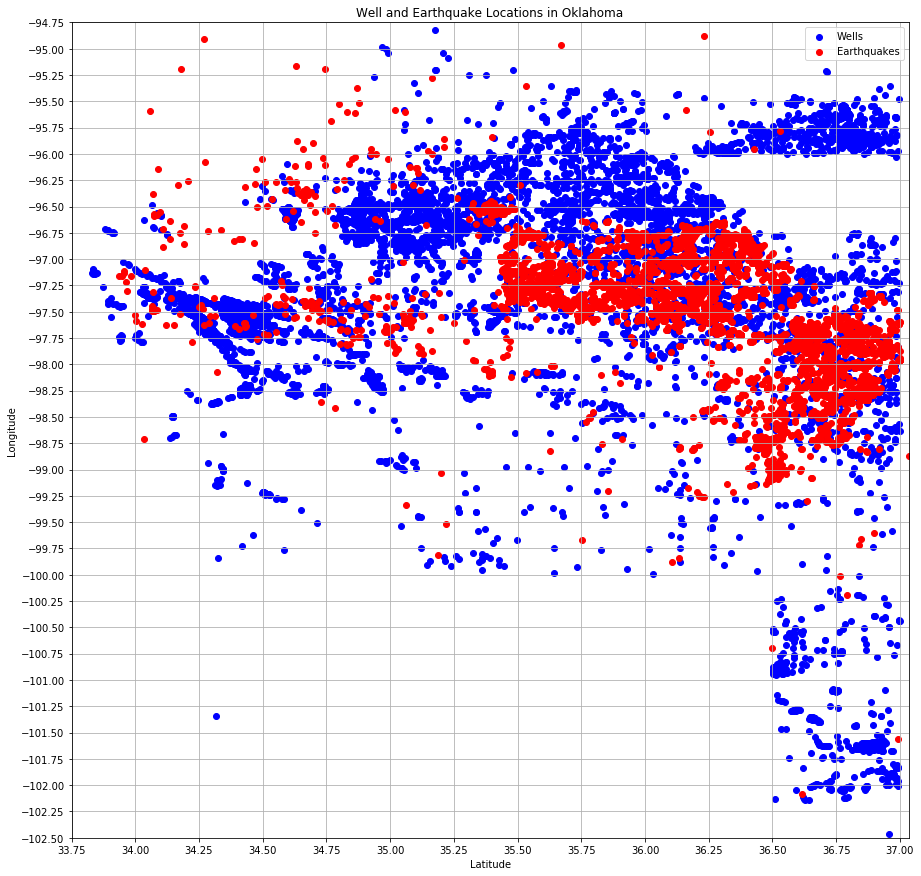

In [9]:
#plot lat/longs of earthquakes
eqs_x = ok_eqs_df["latitude"]
eqs_y = ok_eqs_df["longitude"]

#plot lat/longs of wells
wells_x = ok_inj_wells_df["LAT"]
wells_y = ok_inj_wells_df["LONG"]

#build plot
fig, ax = plt.subplots(figsize = (15,15))
ax.scatter(wells_x, wells_y, c='b', label='Wells')
ax.scatter(eqs_x, eqs_y, c='r', label='Earthquakes')
leg = ax.legend();

#set lims to min and max of longer DF
plt.xlim(min(eqs_x),max(eqs_x))
plt.ylim(min(eqs_y),max(eqs_y))

#set more specific ticks for readability
yticks = np.arange((-102.5),(-94.5), .25)
xticks = np.arange(33.75, 37.25, .25)
plt.yticks(yticks)
plt.xticks(xticks)

#display plot with grid lines & labels
plt.grid()
plt.title("Well and Earthquake Locations in Oklahoma")
plt.xlabel("Latitude")
plt.ylabel("Longitude")


 ## Find Repeat Wells

In [10]:
#number of unique well names
WellNames = ok_inj_wells_df["WellName"].unique()
len(WellNames)

5449

In [11]:
#total number of well names
len(ok_inj_wells_df["WellName"])

9685

In [12]:
#find counts of unique wells
WellNameGroupBy = ok_inj_wells_df["WellName"].value_counts()

#turn groupby into DF
WellNamesDF = pd.DataFrame(WellNameGroupBy)

#change column names
WellNamesDF = WellNamesDF.rename(columns = {"WellName": "Number of Mentions"})

#display DF
WellNamesDF

,Number of Mentions
EAST FITTS UNIT,114
FITTS WEST UNIT,100
HEALDTON V UNIT,76
WILDCAT JIM UNIT,72
WEST HOUGH MORROW UNIT,63
...,...
N. CRESCENT,1
ELIZABETH SWD,1
MAUD MISENER-HUNTON UNIT,1
"OAKS ""A""",1


## Plot PSI

In [13]:
#determine PSI dtype
ok_inj_wells_df.dtypes

API#             float64
Operator          object
Operator ID      float64
WellType          object
WellName          object
WellNumber        object
OrderNumbers     float64
Approval Date     object
County            object
Sec               object
Twp               object
Rng               object
QQQQ              object
LAT              float64
LONG             float64
PSI               object
BBLS              object
ZONE              object
dtype: object

In [14]:
###CONVERT PSI TO INT

#get rid of commas in strings
ok_inj_wells_df["PSI"] = ok_inj_wells_df["PSI"].str.replace(',', '')
ok_inj_wells_df["PSI"].unique()

array(['2500', '2400', '1050', '3152', '1000', '750', '1280', '0', '1500',
       '3500', '500', '1250', '2000', '3000', '2800', '2264', '2320',
       '2375', '2285', '2300', '400', '2250', '2450', '5915', '250',
       '700', '1450', '1200', '1400', '300', '50', '914', '1350', '1600',
       '902', '100', '1700', '325', '110', '850', '800', '200', '1900',
       '1800', '2150', '1912', '1640', '1688', '2100', '1785', '2475',
       '1650', '1550', '1300', '900', '435', '2200', '1675', '4900',
       '4500', '4978', '3600', '1140', '5500', '5000', '4000', '801',
       '980', '1100', '982', '1850', '650', '840', '1026', '950', '1076',
       '1008', '600', '1014', '1816', '1740', '1750', '825', '2342',
       '2570', '420', '1115', '1087', '1235', '1290', '1305', '1210',
       '1862', '3150', '2245', '150', '886', '722', '1145', '1340', '796',
       '1080', '1109', '1195', '1085', '443', '75', '2750', '2280',
       '2947', '2517', '550', '1075', '1135', '2504', '1775', '350',
     

In [15]:
#drop bad data
ok_inj_wells_df = ok_inj_wells_df[~ok_inj_wells_df.PSI.str.contains("/")]
ok_inj_wells_df = ok_inj_wells_df[~ok_inj_wells_df.PSI.str.contains("V")]
ok_inj_wells_df["PSI"].unique()

array(['2500', '2400', '1050', '3152', '1000', '750', '1280', '0', '1500',
       '3500', '500', '1250', '2000', '3000', '2800', '2264', '2320',
       '2375', '2285', '2300', '400', '2250', '2450', '5915', '250',
       '700', '1450', '1200', '1400', '300', '50', '914', '1350', '1600',
       '902', '100', '1700', '325', '110', '850', '800', '200', '1900',
       '1800', '2150', '1912', '1640', '1688', '2100', '1785', '2475',
       '1650', '1550', '1300', '900', '435', '2200', '1675', '4900',
       '4500', '4978', '3600', '1140', '5500', '5000', '4000', '801',
       '980', '1100', '982', '1850', '650', '840', '1026', '950', '1076',
       '1008', '600', '1014', '1816', '1740', '1750', '825', '2342',
       '2570', '420', '1115', '1087', '1235', '1290', '1305', '1210',
       '1862', '3150', '2245', '150', '886', '722', '1145', '1340', '796',
       '1080', '1109', '1195', '1085', '443', '75', '2750', '2280',
       '2947', '2517', '550', '1075', '1135', '2504', '1775', '350',
     

In [16]:
#convert to int
ok_inj_wells_df["PSI"] = ok_inj_wells_df["PSI"].astype(int)
#confirm type
ok_inj_wells_df.dtypes

API#             float64
Operator          object
Operator ID      float64
WellType          object
WellName          object
WellNumber        object
OrderNumbers     float64
Approval Date     object
County            object
Sec               object
Twp               object
Rng               object
QQQQ              object
LAT              float64
LONG             float64
PSI                int32
BBLS              object
ZONE              object
dtype: object

In [17]:
##FROM BRIAN OK WELL INFO##

#convert Approval Date datatype
ok_inj_wells_df['Approval Date'] = pd.to_datetime(ok_inj_wells_df['Approval Date'])

#create isolated year column
ok_inj_wells_df['year'] = ok_inj_wells_df['Approval Date'].dt.year
ok_inj_wells_df

,API#,Operator,Operator ID,WellType,WellName,WellNumber,OrderNumbers,Approval Date,County,Sec,Twp,Rng,QQQQ,LAT,LONG,PSI,BBLS,ZONE,year
0,3.500300e+09,PHOENIX PETROCORP INC,19499.0,2R,SE EUREKA UNIT-TUCKER #1,21,1.338560e+05,1977-09-06,ALFALFA,13,28N,10W,C-SE SE,36.900324,-98.218260,2500,300,CHEROKEE,1977
1,3.500300e+09,CHAMPLIN EXPLORATION INC,4030.0,2R,CHRISTENSEN,1,4.702580e+05,2002-11-27,ALFALFA,21,28N,09W,C-NW NW,36.896636,-98.177720,2400,"1,000",RED FORK,2002
2,3.500321e+09,LINN OPERATING INC,22182.0,2R,NE CHEROKEE UNIT,85,3.294260e+05,1988-08-19,ALFALFA,24,27N,11W,SE NE,36.806113,-98.325840,1050,"1,000",RED FORK,1988
3,3.500321e+09,SANDRIDGE EXPLORATION & PRODUCTION LLC,22281.0,2R,VELMA,2-19,2.816520e+05,1985-07-11,ALFALFA,19,28N,10W,SW NE NE SW,36.888589,-98.318530,3152,"1,000",RED FORK,1985
4,3.500321e+09,CHAMPLIN EXPLORATION INC,4030.0,2R,GRAY,1A,4.702570e+05,2002-11-27,ALFALFA,20,28N,09W,SE SW NW,36.892128,-98.194620,1000,"2,400",RED FORK,2002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11120,3.515323e+09,WOODWARD IODINE CORPORATION,12837.0,2D,"CEI PETROLEUM, INC.",24-1,1.607380e+09,2016-04-22,WOODWARD,24,21N,20W,C SW SW SW,36.276728,-99.298563,1792,"19,999","WABAUNSEE, WOLFCAMPIAN",2016
11121,3.515324e+09,SANDRIDGE EXPLORATION & PRODUCTION LLC,22281.0,2D,JIMMIE SWD,1-28,1.303440e+09,2012-12-07,WOODWARD,28,23N,18W,E2 W2 SW SW,36.436857,-99.137391,2940,"60,000","MUSSELLEM, OKLAHOMA",2012
11122,3.515324e+09,"OVERFLOW ENERGY, LLC",22383.0,CDW,MUTUAL SWD,1,1.608510e+09,2016-10-21,WOODWARD,09,20N,18W,N2 NE NE,0.000000,0.000000,1625,"25,000","DOUGLAS, WOLFCAMP",2016
11123,3.515324e+09,"RED MOUNTAIN OPERATING, LLC",23694.0,2D,HEDGES,1 SWD,1.703870e+09,2016-12-28,WOODWARD,14,21N,17W,SW SE SE,0.000000,0.000000,1550,"15,000","VIRGILIAN, WOLFCAMP,",2016


In [18]:
###MOVE YEAR COLUMN NEXT TO APPROVAL DATE

#put columns in list
WellsCols = ok_inj_wells_df.columns.tolist()
#move year to 8th index
WellsCols.insert(8, 'year')
#remove duplicate year from end of list
WellsCols.pop()
WellsCols

['API#',
 'Operator',
 'Operator ID',
 'WellType',
 'WellName',
 'WellNumber',
 'OrderNumbers',
 'Approval Date',
 'year',
 'County',
 'Sec',
 'Twp',
 'Rng',
 'QQQQ',
 'LAT',
 'LONG',
 'PSI',
 'BBLS',
 'ZONE']

In [19]:
#reset df columns
clean_wells_df = ok_inj_wells_df[WellsCols]
clean_wells_df

,API#,Operator,Operator ID,WellType,WellName,WellNumber,OrderNumbers,Approval Date,year,County,Sec,Twp,Rng,QQQQ,LAT,LONG,PSI,BBLS,ZONE
0,3.500300e+09,PHOENIX PETROCORP INC,19499.0,2R,SE EUREKA UNIT-TUCKER #1,21,1.338560e+05,1977-09-06,1977,ALFALFA,13,28N,10W,C-SE SE,36.900324,-98.218260,2500,300,CHEROKEE
1,3.500300e+09,CHAMPLIN EXPLORATION INC,4030.0,2R,CHRISTENSEN,1,4.702580e+05,2002-11-27,2002,ALFALFA,21,28N,09W,C-NW NW,36.896636,-98.177720,2400,"1,000",RED FORK
2,3.500321e+09,LINN OPERATING INC,22182.0,2R,NE CHEROKEE UNIT,85,3.294260e+05,1988-08-19,1988,ALFALFA,24,27N,11W,SE NE,36.806113,-98.325840,1050,"1,000",RED FORK
3,3.500321e+09,SANDRIDGE EXPLORATION & PRODUCTION LLC,22281.0,2R,VELMA,2-19,2.816520e+05,1985-07-11,1985,ALFALFA,19,28N,10W,SW NE NE SW,36.888589,-98.318530,3152,"1,000",RED FORK
4,3.500321e+09,CHAMPLIN EXPLORATION INC,4030.0,2R,GRAY,1A,4.702570e+05,2002-11-27,2002,ALFALFA,20,28N,09W,SE SW NW,36.892128,-98.194620,1000,"2,400",RED FORK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11120,3.515323e+09,WOODWARD IODINE CORPORATION,12837.0,2D,"CEI PETROLEUM, INC.",24-1,1.607380e+09,2016-04-22,2016,WOODWARD,24,21N,20W,C SW SW SW,36.276728,-99.298563,1792,"19,999","WABAUNSEE, WOLFCAMPIAN"
11121,3.515324e+09,SANDRIDGE EXPLORATION & PRODUCTION LLC,22281.0,2D,JIMMIE SWD,1-28,1.303440e+09,2012-12-07,2012,WOODWARD,28,23N,18W,E2 W2 SW SW,36.436857,-99.137391,2940,"60,000","MUSSELLEM, OKLAHOMA"
11122,3.515324e+09,"OVERFLOW ENERGY, LLC",22383.0,CDW,MUTUAL SWD,1,1.608510e+09,2016-10-21,2016,WOODWARD,09,20N,18W,N2 NE NE,0.000000,0.000000,1625,"25,000","DOUGLAS, WOLFCAMP"
11123,3.515324e+09,"RED MOUNTAIN OPERATING, LLC",23694.0,2D,HEDGES,1 SWD,1.703870e+09,2016-12-28,2016,WOODWARD,14,21N,17W,SW SE SE,0.000000,0.000000,1550,"15,000","VIRGILIAN, WOLFCAMP,"


In [37]:
#group by year
WellsGroupbyYear = clean_wells_df.groupby(["year"])
#get PSI totals by year
YearlyPSITotal = WellsGroupbyYear["PSI"].sum()


0                   API#        Operator  Operator I...
1                   API#                        Oper...
2                   API#                 Operator  O...
3                   API#            Operator  Operat...
4                   API#                      Operat...
                            ...                        
67                   API#                           ...
68                   API#                           ...
69                   API#                           ...
70                   API#                           ...
71                   API#                         Op...
Name: 1, Length: 72, dtype: object

Text(0, 0.5, 'Pounds Per Square Inch')

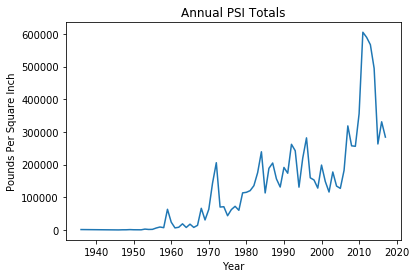

In [21]:
#plot yearl PSIs
plt.plot(YearlyPSITotal)
plt.title("Annual PSI Totals")
plt.xlabel("Year")
plt.ylabel("Pounds Per Square Inch")

Text(0, 0.5, 'Number of Wells')

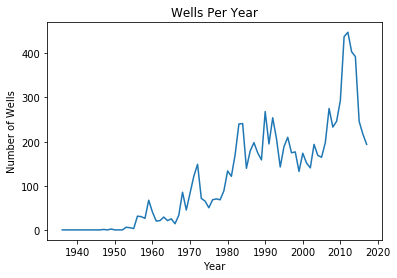

In [22]:
#plot number of wells per year
WellCounts = WellsGroupbyYear["WellName"].count()
plt.plot(WellCounts)
plt.title("Wells Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Wells")

Text(0, 0.5, 'Pounds Per Square Inch')

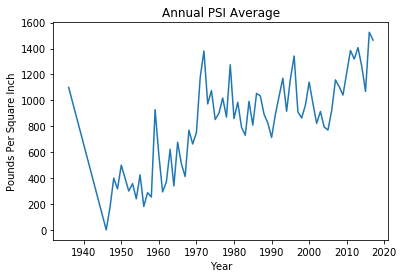

In [23]:
YearlyPsiAvg = WellsGroupbyYear["PSI"].mean()
plt.plot(YearlyPsiAvg)
plt.title("Annual PSI Average")
plt.xlabel("Year")
plt.ylabel("Pounds Per Square Inch")